In [1]:
versioninfo()

Julia Version 1.0.3
Commit 099e826241 (2018-12-18 01:34 UTC)
Platform Info:
  OS: Linux (x86_64-pc-linux-gnu)
  CPU: Intel(R) Core(TM) i5-8250U CPU @ 1.60GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-6.0.0 (ORCJIT, skylake)


In [2]:
using DifferentialEquations, ParameterizedFunctions, PyPlot

In [3]:
running = @ode_def RunningParams begin
    # note all couplings are for squared, i.e. "g1"==g1^2, except l = lambda
    # note g1^2 = 5/3*gy^2
    dg1 = g1^2/(4*pi)^2*(41/10) +
          g1^2/(4*pi)^4*(44/5*g3 +27/10*g2 +199/50*g1 -17/10*yt -1/2*yb -3/2*ytau)
    dg2 = g2^2/(4*pi)^2*(-19/6) +
          g2^2/(4*pi)^4*(12*g3 +35/6*g2 +9/10*g1 -3/2*yt -3/2*yb -1/2*ytau)
    dg3 = g3^2/(4*pi)^2*(-7) +
          g3^2/(4*pi)^4*(-26*g3 +9/2*g2 +11/10*g1 -2*yt -2*yb)
    dyt = yt/(4*pi)^2*(9/2*yt +3/2*yb +ytau -8*g3 -9/4*g2 -17/20*g1) + 
          yt/(4*pi)^4*(yt*(-12*yt -11/4*yb -9/4*ytau -12*l +36*g3 +225/16*g2 +393/80*g1) +
                        yb*(-1/4*yb +5/4*ytau +4*g3 +99/16*g2 +7/80*g1) +ytau*(-9/4*ytau +15/8*g2 +15/8*g1) +
                        6*l^2 -108*g3^2 -23/4*g2^2 +1187/600*g1^2 +9*g3*g2 + 19/15*g3*g1 - 9/20*g2*g1)
    
#     dyb = yb/(4*pi)^2*(3/2*yt +9/2*yb +ytau -8*g3 -9/4*g2 -1/4*g1) +
#           yb/(4*pi)^4*(yt*(-1/4*yt -11/4*yb +5/4*ytau +4*g3 +99/16*g2 +91/80*g1) +
#                         yb*(-12*yb -9/4*ytau -12*l +36*g3 +225/16*g2 +237/80*g1) + 
#                         ytau*(-9/4*ytau +15/8*g2 +15/8*g1) +
#                         6*l^2 -108*g3^2 -23/4*g2^2 -127/600*g1^2 +9*g3*g2 +31/15*g3*g1 -27/20*g2*g1)
#     dytau = ytau/(4*pi)^2*(3*yt +3*yb +5/2*ytau -9/4*g2 -9/4*g1) +
#             ytau/(4*pi)^4*(6*l^2 -23/4*g2^2 +1371/200*g1^2 +27/20*g2*g1 + 
#                         yt*(-27/4*yt +3/2*yb -27/4*ytau +20*g3 +45/8*g2 +17/8*g1) +
#                         yb*(-27/4*yb -27/4*ytau +20*g3 +45/8*g2 +5/8*g1) + 
#                         ytau*(-3*ytau -12*l +165/16*g2 +537/80*g1))
    
    dm  = m/(4*pi)^2*(6*l +3*yt +3*yb +ytau -9/4*g2 -9/20*g1) +
          m/(4*pi)^4*(l*(-30*l -36*yt -36*yb -12*ytau +36*g2 +36/5*g1) + 
                        yt*(-27/4*yt -21/2*yb +20*g3 +45/8*g2 +17/8*g1) + 
                        yb*(-27/4*yb +20*g3 +45/8*g2 +5/8*g1) + 
                        ytau*(-9/4*ytau +15/8*g2 +15/8*g1) -145/32*g2^2 +1671/800*g1^2 +9/16*g2*g1)
    dl  = 1/(4*pi)^2*(l*(12*l +6*yt +6*yb +2*ytau -9/2*g2 -9/10*g1) +
                        -3*yt^2 -3*yb^2 -ytau^2 +9/16*g2^2 +27/400*g1^2 +9/40*g2*g1) + 
          1/(4*pi)^4*(l^2*(-156*l -72*yt -72*yb -24*ytau +54*g2 +54/5*g1) + 
                        l*yt*(-3/2*yt -21*yb +40*g3 +45/4*g2 +17/4*g1) + 
                        l*yb*(-3/2*yb +40*g3 +45/4*g2 +5/4*g1) +l*ytau*(-1/2*yt +15/4*g2 +15/4*g1) +
                        l*(-73/16*g2^2 +1887/400*g1^2 +117/40*g2*g1) + 
                        yt^2*(15*yt -3*yb -16*g3 -4/5*g1) +yt*(-9/8*g2^2 -171/200*g1^2 +63/20*g1*g2) +
                        yb^2*(-3*yt +15*yb -16*g3 +2/5*g1) + yb*(-9/8*g2^2 +9/40*g1^2 +27/20*g1*g2) +
                        ytau^2*(5*ytau -6/5*g1) +ytau*(-3/8*g2^2 -9/8*g1^2 +33/20*g2*g1) +
                        305/32*g2^3 -3411/4000*g1^3 -289/160*g2^2*g1 -1677/800*g2*g1^2)
end ytau yb
;

In [4]:
# list of observables
obsmw = 80.384
obsmz = 91.1876
obsmh = 125.15
obsmt = 173.34
obsa3 = 0.1184

gy0 = 0.35830 + 0.00011*(obsmt-173.34) - 0.00020/0.0014*(obsmw-80.384)
g20 = 0.64779 + 0.00004*(obsmt-173.34) + 0.00011/0.0014*(obsmw-80.384)
g30 = 1.1666 + 0.00314/0.0007*(obsa3-0.1184)-0.00046*(obsmt-173.34)
l0 = 0.12604 + 0.00206*(obsmh-125.15) - 0.00004*(obsmt-173.34)
m0 = 131.55 + 0.94*(obsmh-125.15) + 0.17*(obsmt-173.34)
yt0 = 0.93690 + 0.00556*(obsmt-173.34) - 0.00042/0.0007*(obsa3-0.1184)

initial = [5/3*gy0^2 ; g20^2 ; g30^2 ; yt0^2 ; m0^2 ; l0]
ytauyb = [0., 0.,]

mplanck = 2.435*10^18
maxmu = mplanck
muspan = (2*log(obsmt),2*log(maxmu))
prob = ODEProblem(running, initial, muspan, ytauyb)    

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (10.310509967412397, 84.67295686085475)
u0: [0.213965, 0.419632, 1.36096, 0.877782, 17305.4, 0.12604]

In [5]:
@time sol = solve(prob,reltol=1e-6,abstol=1e-6)

 15.106069 seconds (39.11 M allocations: 1.968 GiB, 8.09% gc time)


retcode: Success
Interpolation: 3rd order Hermite
t: 15-element Array{Float64,1}:
 10.310509967412397
 10.436598236569198
 11.4509364027433  
 13.384602621861456
 15.848670067488294
 18.800026960962818
 22.39256798245007 
 26.672144042779056
 31.787432475502786
 37.85285091858383 
 45.04622770838232 
 53.548948641191686
 63.593291591465075
 75.44022171289049 
 84.67295686085475 
u: 15-element Array{Array{Float64,1},1}:
 [0.213965, 0.419632, 1.36096, 0.877782, 17305.4, 0.12604]      
 [0.214118, 0.419203, 1.35036, 0.871482, 17339.3, 0.12477]      
 [0.215355, 0.415779, 1.27085, 0.82409, 17601.1, 0.115119]      
 [0.21775, 0.409388, 1.14289, 0.747272, 18051.1, 0.0990964]     
 [0.220875, 0.4015, 1.01327, 0.66856, 18544.1, 0.0821707]       
 [0.224733, 0.392417, 0.892407, 0.594064, 19035.7, 0.0656854]   
 [0.229608, 0.381873, 0.779538, 0.523219, 19514.5, 0.049654]    
 [0.235691, 0.369999, 0.677695, 0.457909, 19946.0, 0.0347201]   
 [0.243389, 0.356711, 0.586344, 0.397879, 20304.8, 0.0211

In [6]:
final = sol[end]

6-element Array{Float64,1}:
     0.36692878448590405
     0.25967184856803666
     0.2458497231630952 
     0.1534716827602082 
 19573.191921700465     
    -0.01532511180273573

In [7]:
[sqrt.(sol.u[end][1:5]) ; sol.u[end][6]]

6-element Array{Float64,1}:
   0.6057464688183531 
   0.5095800708112874 
   0.49583235388898855
   0.39175462059841515
 139.9042241024211    
  -0.01532511180273573

In [8]:
sol(2*log(2000))

6-element Array{Float64,1}:
     0.22004671007801505
     0.4035434023375143 
     1.0443272264283194 
     0.6875187424993878 
 18422.614109374397     
     0.08629489450743458

In [9]:
nn = 100;
gtable = zeros(6,nn)
logx = collect(range(log(obsmt),stop=log(maxmu),length=nn))
x = exp.(logx)
for i=1:100
    temp = sol(2*logx[i])
    gtable[1:5,i] = sqrt.(temp[1:5])
    gtable[6,i] = temp[6]
end

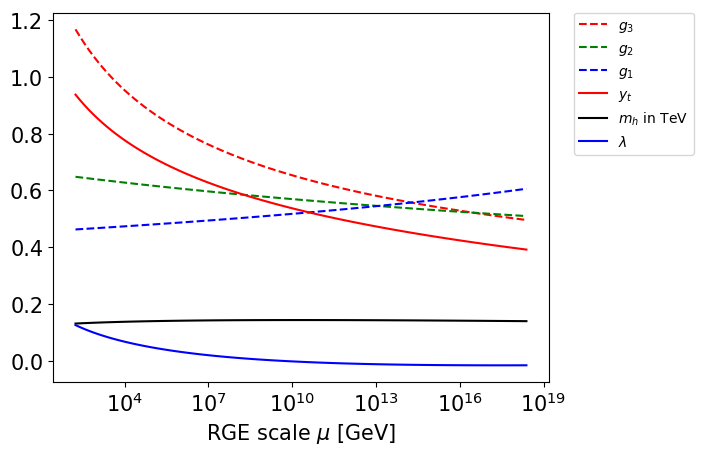

PyObject <matplotlib.legend.Legend object at 0x7efeb809d550>

In [10]:
fig, ax = subplots()
ax[:semilogx](x,gtable[3,:], color="r",linestyle="--",label=L"g_3")
ax[:semilogx](x,gtable[2,:], color="g",linestyle="--",label=L"g_2")
ax[:semilogx](x,gtable[1,:], color="b",linestyle="--",label=L"g_1")
ax[:semilogx](x,gtable[4,:], color="r",linestyle="-",label=L"y_t")
ax[:semilogx](x,gtable[5,:]/1000, color="k",linestyle="-",label=L"$m_h$ in TeV")
ax[:semilogx](x,gtable[6,:], color="b",linestyle="-",label=L"\lambda")

ax[:tick_params]("both",labelsize=15) 

xlabel(L"RGE scale $\mu $ [GeV]", fontsize=15)
ax[:legend](bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fancybox=1)
# ax[:legend](borderaxespad=0.4, fancybox=1)

In [11]:
# check whether we can get back the initial values if we run from mplanck to mtop
muspan = (2*log(maxmu),2*log(obsmt))
prob = ODEProblem(running, final, muspan, ytauyb)
@time sol = solve(prob,reltol=1e-6,abstol=1e-6)
(sol[end]-initial)./initial

  2.634710 seconds (2.78 M allocations: 134.257 MiB, 3.26% gc time)


6-element Array{Float64,1}:
  2.096513197697868e-11 
  1.2072361165381213e-12
 -4.0718078694863864e-7 
 -3.430812713241717e-7  
  1.1313192733700396e-8 
 -4.835269187404632e-7  

In [12]:
nn = 100;
gtable = zeros(6,nn)
logx = collect(range(log(obsmt),stop=log(10000),length=nn))
x = exp.(logx)
for i=1:100
    temp = sol(2*logx[i])
    gtable[1:5,i] = sqrt.(temp[1:5])
    gtable[6,i] = temp[6]
end

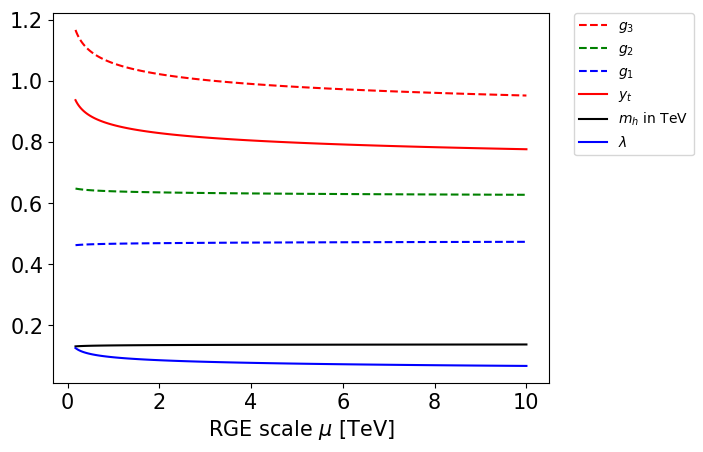

PyObject <matplotlib.legend.Legend object at 0x7efe62d8cf28>

In [13]:
fig, ax = subplots()
ax[:plot](x/1000,gtable[3,:], color="r",linestyle="--",label=L"g_3")
ax[:plot](x/1000,gtable[2,:], color="g",linestyle="--",label=L"g_2")
ax[:plot](x/1000,gtable[1,:], color="b",linestyle="--",label=L"g_1")
ax[:plot](x/1000,gtable[4,:], color="r",linestyle="-",label=L"y_t")
ax[:plot](x/1000,gtable[5,:]/1000, color="k",linestyle="-",label=L"$m_h$ in TeV")
ax[:plot](x/1000,gtable[6,:], color="b",linestyle="-",label=L"\lambda")

ax[:tick_params]("both",labelsize=15) 

xlabel(L"RGE scale $\mu $ [TeV]", fontsize=15)
ax[:legend](bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fancybox=1)
# ax[:legend](borderaxespad=0.4, fancybox=1)

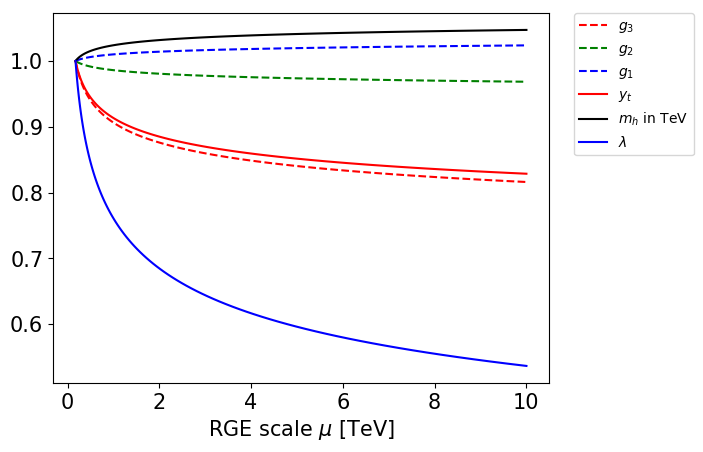

PyObject <matplotlib.legend.Legend object at 0x7efe62dc2160>

In [14]:
fig, ax = subplots()
ax[:plot](x/1000,gtable[3,:]/gtable[3,1], color="r",linestyle="--",label=L"g_3")
ax[:plot](x/1000,gtable[2,:]/gtable[2,1], color="g",linestyle="--",label=L"g_2")
ax[:plot](x/1000,gtable[1,:]/gtable[1,1], color="b",linestyle="--",label=L"g_1")
ax[:plot](x/1000,gtable[4,:]/gtable[4,1], color="r",linestyle="-",label=L"y_t")
ax[:plot](x/1000,gtable[5,:]/gtable[5,1], color="k",linestyle="-",label=L"$m_h$ in TeV")
ax[:plot](x/1000,gtable[6,:]/gtable[6,1], color="b",linestyle="-",label=L"\lambda")

ax[:tick_params]("both",labelsize=15) 

xlabel(L"RGE scale $\mu $ [TeV]", fontsize=15)
ax[:legend](bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fancybox=1)
# ax[:legend](borderaxespad=0.4, fancybox=1)

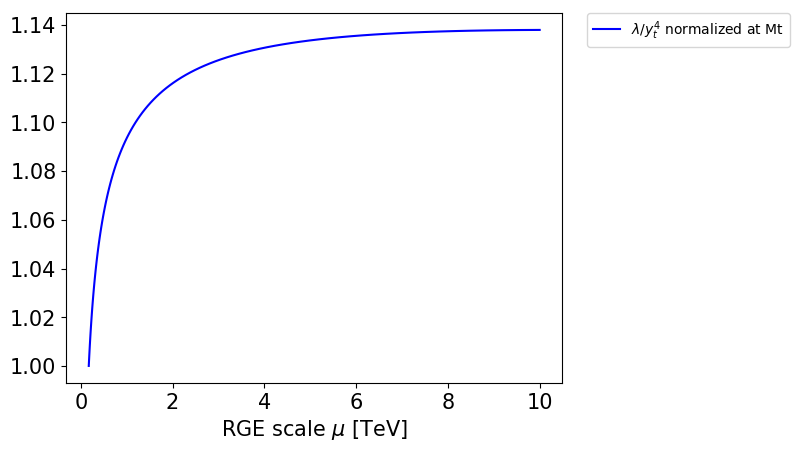

PyObject <matplotlib.legend.Legend object at 0x7efe62d674e0>

In [15]:
fig, ax = subplots()
ax[:plot](x/1000,gtable[6,:]/gtable[6,1]./(gtable[4,:]/gtable[4,1]).^4, color="b",linestyle="-",
                label=L"${\lambda}/{y_t^4}$ normalized at Mt")

ax[:tick_params]("both",labelsize=15) 

xlabel(L"RGE scale $\mu $ [TeV]", fontsize=15)
ax[:legend](bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fancybox=1)
# ax[:legend](borderaxespad=0.4, fancybox=1)

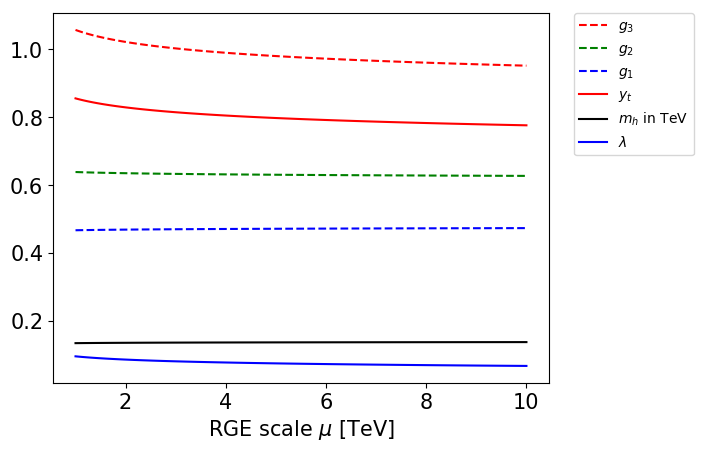

  0.000206 seconds (318 allocations: 27.766 KiB)


PyObject <matplotlib.legend.Legend object at 0x7efe66c69518>

In [16]:
# running between 1-10 TeV
maxmu = 10000
muspan = (2*log(obsmt),2*log(maxmu))
prob = ODEProblem(running, initial, muspan, ytauyb)
@time sol = solve(prob,reltol=1e-6,abstol=1e-6)


nn = 100;
gtable = zeros(6,nn)
logx = collect(range(log(1000),stop=log(10000),length=nn))
x = exp.(logx)
for i=1:100
    temp = sol(2*logx[i])
    gtable[1:5,i] = sqrt.(temp[1:5])
    gtable[6,i] = temp[6]
end


fig, ax = subplots()
ax[:plot](x/1000,gtable[3,:], color="r",linestyle="--",label=L"g_3")
ax[:plot](x/1000,gtable[2,:], color="g",linestyle="--",label=L"g_2")
ax[:plot](x/1000,gtable[1,:], color="b",linestyle="--",label=L"g_1")
ax[:plot](x/1000,gtable[4,:], color="r",linestyle="-",label=L"y_t")
ax[:plot](x/1000,gtable[5,:]/1000, color="k",linestyle="-",label=L"$m_h$ in TeV")
ax[:plot](x/1000,gtable[6,:], color="b",linestyle="-",label=L"\lambda")

ax[:tick_params]("both",labelsize=15) 

xlabel(L"RGE scale $\mu $ [TeV]", fontsize=15)
ax[:legend](bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fancybox=1)
# ax[:legend](borderaxespad=0.4, fancybox=1)

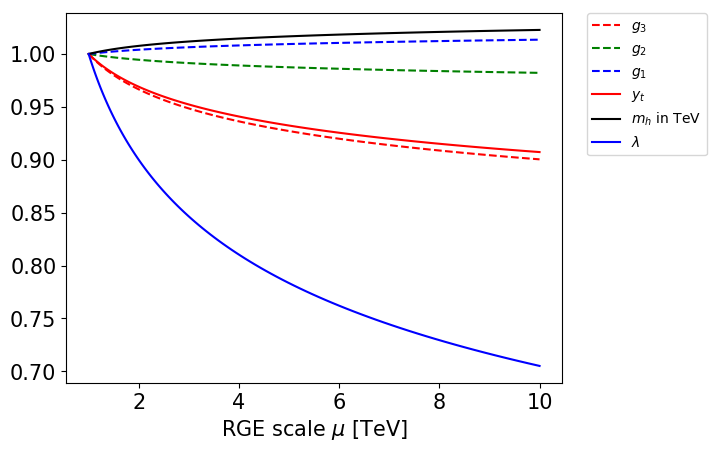

PyObject <matplotlib.legend.Legend object at 0x7efe66c37b38>

In [17]:
fig, ax = subplots()
ax[:plot](x/1000,gtable[3,:]/gtable[3,1], color="r",linestyle="--",label=L"g_3")
ax[:plot](x/1000,gtable[2,:]/gtable[2,1], color="g",linestyle="--",label=L"g_2")
ax[:plot](x/1000,gtable[1,:]/gtable[1,1], color="b",linestyle="--",label=L"g_1")
ax[:plot](x/1000,gtable[4,:]/gtable[4,1], color="r",linestyle="-",label=L"y_t")
ax[:plot](x/1000,gtable[5,:]/gtable[5,1], color="k",linestyle="-",label=L"$m_h$ in TeV")
ax[:plot](x/1000,gtable[6,:]/gtable[6,1], color="b",linestyle="-",label=L"\lambda")

ax[:tick_params]("both",labelsize=15) 

xlabel(L"RGE scale $\mu $ [TeV]", fontsize=15)
ax[:legend](bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fancybox=1)
# ax[:legend](borderaxespad=0.4, fancybox=1)

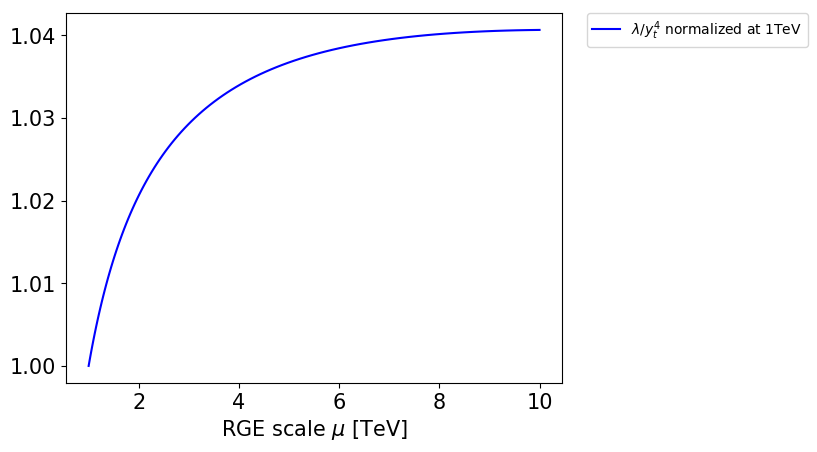

PyObject <matplotlib.legend.Legend object at 0x7efe6290ea90>

In [18]:
fig, ax = subplots()
ax[:plot](x/1000,gtable[6,:]/gtable[6,1]./(gtable[4,:]/gtable[4,1]).^4, color="b",linestyle="-",
                label=L"${\lambda}/{y_t^4}$ normalized at 1TeV")

ax[:tick_params]("both",labelsize=15) 

xlabel(L"RGE scale $\mu $ [TeV]", fontsize=15)
ax[:legend](bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fancybox=1)
# ax[:legend](borderaxespad=0.4, fancybox=1)

In [19]:
temp = sol(2*log(2000))
[sqrt.(temp[1:5]) ; temp[6]]

6-element Array{Float64,1}:
   0.4690913664500926 
   0.6352506610287897 
   1.021923297722642  
   0.829167499664204  
 135.72993077937673   
   0.08629489450743458

In [20]:
temp = sol(2*log(2000))
[sqrt(temp[1]*3/5) ; sqrt.(temp[2:5]) ; temp[6]]

6-element Array{Float64,1}:
   0.36335661002217784
   0.6352506610287897 
   1.021923297722642  
   0.829167499664204  
 135.72993077937673   
   0.08629489450743458

In [21]:
0.0862949/0.829167^4*2*pi^2/6

0.6006141827830531

In [22]:
vev = sqrt(temp[5]/2/temp[6])/1000
mw = sqrt(temp[2])/2*vev
mz = sqrt(temp[2]+temp[1]*3/5)/2*vev
mt = sqrt(temp[4]/2)*vev
mh = sqrt(temp[5])/1000
[vev ; mw ; mz ; mt ; mh]

5-element Array{Float64,1}:
 0.326714251182749  
 0.10377272201568366
 0.11954922997905978
 0.19155582011480823
 0.13572993077937673

In [23]:
sqrt(temp[4]/2)*246

144.23225059100506

In [24]:
sqrt(initial[5]/2/initial[6])

262.0122866449279

In [25]:
kR = 2000
muspan = (2*log(obsmt),2*log(kR))
prob = ODEProblem(running, initial, muspan, ytauyb)
@time sol = solve(prob,reltol=1e-6,abstol=1e-6,save_everystep=false)

  0.335122 seconds (639.07 k allocations: 33.630 MiB, 3.23% gc time)


retcode: Success
Interpolation: 1st order linear
t: 2-element Array{Float64,1}:
 10.310509967412397
 15.201804919084164
u: 2-element Array{Array{Float64,1},1}:
 [0.213965, 0.419632, 1.36096, 0.877782, 17305.4, 0.12604]  
 [0.220047, 0.403543, 1.04433, 0.687519, 18422.6, 0.0862949]

In [26]:
[sqrt.(sol.u[2][1:5]) ; sol.u[2][6]]

6-element Array{Float64,1}:
   0.4690913664500974 
   0.6352506610288109 
   1.0219232977173898 
   0.8291674996611987 
 135.7299307797038    
   0.08629489450578112

In [27]:
     0.220047 
     0.403543 
     1.04433  
     0.687519 
 18422.6      
     0.0862949

0.0862949

In [28]:
# naive values from pole masses
naiveyt = 173.21/246*sqrt(2); naivel = (125.09/246)^2/2; naivev = 246;
# msbar value at mt
msyt = yt0; msl = l0; msv = m0/sqrt(2*l0);
# msbar value at 2 TeV
msyt2 = sqrt(sol[2][4]); msl2 = sol[2][6]; msv2 = sqrt(sol[2][5])/sqrt(2*msl2);
[naiveyt naivel naivev; msyt msl msv; msyt2 msl2 msv2]

3×3 Array{Float64,2}:
 0.995756  0.129284   246.0  
 0.9369    0.12604    262.012
 0.829167  0.0862949  326.714

In [29]:
[naiveyt/msyt2 sqrt(naivel/msl2)].^(-1)

1×2 Array{Float64,2}:
 0.832702  0.816996